In [83]:
import numpy as np
import pandas as pd
import seaborn as sns

In [84]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [85]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [89]:
print(train.isnull().sum(), test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Train dataset

Age-177
Cabin-687
Embarked-2

In [90]:
#embarked
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [91]:
train['Embarked'].fillna('S',inplace=True)

C:\Users\Nikhi\AppData\Local\Temp\ipykernel_3388\535005595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S',inplace=True)


In [92]:
#Cabin
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [93]:
#Age
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [94]:
#we are assuming that age column might be normally distributed, which means that the upper range = mean+1SD & lower range = mean-1SD
#we also know in train dataset we have 177 nan values and 86 nan in test dataset

train_age = np.random.randint(train['Age'].mean()-train['Age'].std(), train['Age'].mean()+train['Age'].std(),177)
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(), test['Age'].mean()+test['Age'].std(),86)

train['Age'][train['Age'].isnull()] = train_age
test['Age'][test['Age'].isnull()] = test_age

C:\Users\Nikhi\AppData\Local\Temp\ipykernel_3388\25209178.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][train['Age'].isnull()] = train_age
C:\Users\Nikhi\AppData\Local\Temp\ipykernel_3388\25209178.py:7: SettingWithCopyWarn

In [95]:
# fare NaN value in test dataset
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [96]:
test['Fare'][test['Pclass']==3].mean()

12.459677880184334

In [97]:
test['Fare'].fillna(12.4596,inplace=True)

C:\Users\Nikhi\AppData\Local\Temp\ipykernel_3388\4162044147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(12.4596,inplace=True)


In [98]:
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

C:\Users\Nikhi\AppData\Local\Temp\ipykernel_3388\1460700508.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

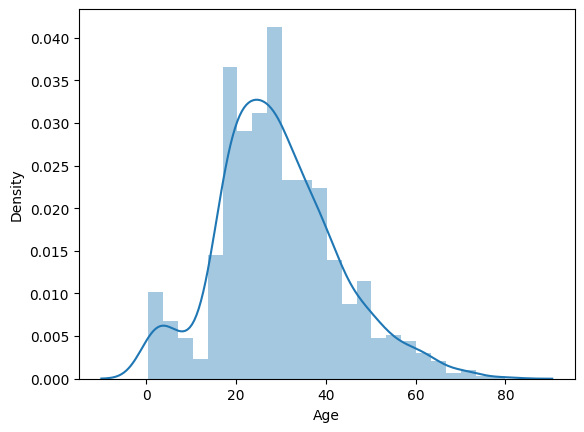

In [99]:
#lets see if age column is normally distributed or not ?
sns.distplot(train['Age'])

# PCLASS

In [100]:
train[train['Pclass']==1]['Survived'].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

In [101]:
train[train['Pclass']==2]['Survived'].value_counts()

Survived
0    97
1    87
Name: count, dtype: int64

In [102]:
train[train['Pclass']==3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [103]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

# GENDER

In [104]:
train.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [105]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Chances of female(74%) to survive is much higher than that of male(18%) |||| "Gender ∝ survived"

# EMBARKED

In [106]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

People who are visiting C have higher chances of surviving than that of people going to Q or S |||| "Embarked ∝ survived"

# FARE

In [107]:
print("avg fare of pclass1 passenger",train['Fare'][train['Pclass']==1].mean())
print("avg fare of pclass2 passenger",train['Fare'][train['Pclass']==2].mean())
print("avg fare of pclass3 passenger",train['Fare'][train['Pclass']==3].mean())

avg fare of pclass1 passenger 84.1546875
avg fare of pclass2 passenger 20.662183152173913
avg fare of pclass3 passenger 13.675550101832993


In [108]:
#though fare and Pclass both defines same property which may result our model to overfit

In [109]:
train.drop(columns=['Fare'],inplace=True)
test.drop(columns=['Fare'],inplace=True)

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S


# AGE

C:\Users\Nikhi\AppData\Local\Temp\ipykernel_3388\3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\Nikhi\AppData\Local\Temp\ipykernel_3388\3826302481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

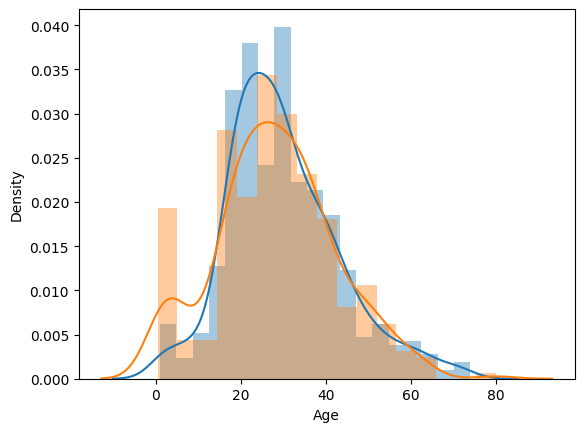

In [111]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

In [112]:
#This concludes children and old people were rescued first

# FAMILY
SibSp = siblings and spouse &
Parch = Parents and children

In [113]:
train['Family'] = train['SibSp']+train['Parch']+1
test['Family'] = test['SibSp']+test['Parch']+1
train['Family'].value_counts() #Family column is categorical

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [114]:
#converting family column in a categorical column which it is:

def cal(num):
    if num == 1:
        return 'alone'
    elif num > 1 and num < 5:
        return 'medium'
    else:
        return 'large'
    
train['Family_type'] =train['Family'].apply(cal)
test['Family_type'] =test['Family'].apply(cal)

In [115]:
passenger_Id = test['PassengerId'].values

In [116]:
#droping passengerId,Name,SibSp,Parch,Ticket,Family

train.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Family'],inplace=True)
test.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Family'],inplace=True)

In [119]:
# converting categorical columns to numerical
#Can't use encoding, bcoz it will confuse algorithm and it'll start priortizing the 1 over 2 or 3 which may create problem
train = pd.get_dummies(train,columns=['Pclass','Sex','Embarked','Family_type'],drop_first=True)
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Family_type'],drop_first=True)

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Age                 891 non-null    float64
 2   Pclass_2            891 non-null    bool   
 3   Pclass_3            891 non-null    bool   
 4   Sex_male            891 non-null    bool   
 5   Embarked_Q          891 non-null    bool   
 6   Embarked_S          891 non-null    bool   
 7   Family_type_large   891 non-null    bool   
 8   Family_type_medium  891 non-null    bool   
dtypes: bool(7), float64(1), int64(1)
memory usage: 20.1 KB


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 418 non-null    float64
 1   Pclass_2            418 non-null    bool   
 2   Pclass_3            418 non-null    bool   
 3   Sex_male            418 non-null    bool   
 4   Embarked_Q          418 non-null    bool   
 5   Embarked_S          418 non-null    bool   
 6   Family_type_large   418 non-null    bool   
 7   Family_type_medium  418 non-null    bool   
dtypes: bool(7), float64(1)
memory usage: 6.2 KB


# MODEL BUILDING

In [131]:
from sklearn.model_selection import train_test_split
X = train.iloc[:,1:].values
y = train.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [126]:
print(X_train.shape,y_train.shape)

(712, 8) (712,)


In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(min_samples_leaf=8)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=8)

In [161]:
y_pred = dtc.predict(X_test)
print("Accuracy_Score :", accuracy_score(y_test,y_pred))

Accuracy_Score : 0.8212290502793296


In [169]:
#test column
X_f = test.iloc[:,:].values

In [165]:
passenger_Id.shape

(418,)

In [170]:
y_final = dtc.predict(X_f)
y_final.shape

(418,)

In [178]:
final_df = pd.DataFrame() #empty dataframe

In [181]:
final_df['PassengerId'] = passenger_Id
final_df['Survived'] = y_final
final_df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [182]:
final_df.to_csv('submission.csv',index=False)